# Multi-Class Prediction of Obesity Risk
https://www.kaggle.com/competitions/playground-series-s4e2/data?select=sample_submission.csv


In [65]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [66]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [67]:
import pandas as pd

In [68]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [69]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [70]:
len(df_test)

13840

## Data processing

### One hot encoding

In [71]:
import pandas as pd

# Initialize the DataFrame with your data
# Assuming df_train is your DataFrame
df_encoded = df_train.copy()

# List of columns to one-hot encode
columns_to_encode = ['Gender', 'CAEC', 'FAF', 'family_history_with_overweight',
                     'FAVC', 'CALC', 'MTRANS', 'SMOKE', 'SCC']
                    #  'NObeyesdad'

# Perform one-hot encoding for each column and concatenate with the original DataFrame
for col in columns_to_encode:
    one_hot_encoded = pd.get_dummies(df_encoded[col], prefix=col)
    df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

# Drop the original columns
df_encoded.drop(columns=columns_to_encode, inplace=True)

print(df_encoded)


          id        Age    Height      Weight      FCVC       NCP      CH2O  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...      ...        ...       ...         ...       ...       ...       ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            TUE           NObeyesdad  Gender_Female

In [72]:
df_encoded.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,TUE,NObeyesdad,Gender_Female,...,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.976473,Overweight_Level_II,0,...,0,0,0,0,1,0,1,0,1,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,Normal_Weight,1,...,1,1,0,0,0,0,1,0,1,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,1.673584,Insufficient_Weight,1,...,1,0,0,0,1,0,1,0,1,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,0.780199,Obesity_Type_III,1,...,0,0,0,0,1,0,1,0,1,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,0.931721,Overweight_Level_II,0,...,0,0,0,0,1,0,1,0,1,0


In [92]:
# drop the id column
df_encoded.drop(columns='id')

,Age,Height,Weight,FCVC,NCP,CH2O,TUE,NObeyesdad,Gender_Female,Gender_Male,...,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,encoded_NObeyesdad
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.976473,Overweight_Level_II,0,1,...,0,0,0,1,0,1,0,1,0,6
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,Normal_Weight,1,0,...,1,0,0,0,0,1,0,1,0,1
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,1.673584,Insufficient_Weight,1,0,...,0,0,0,1,0,1,0,1,0,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,0.780199,Obesity_Type_III,1,0,...,0,0,0,1,0,1,0,1,0,4
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,0.931721,Overweight_Level_II,0,1,...,0,0,0,1,0,1,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,0.196680,Obesity_Type_II,0,1,...,0,0,0,1,0,1,0,1,0,3
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,1.000000,Insufficient_Weight,0,1,...,0,0,0,1,0,1,0,1,0,0
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.198439,Obesity_Type_II,0,1,...,0,0,0,1,0,1,0,1,0,3
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.973834,Overweight_Level_II,0,1,...,1,0,0,0,0,1,0,1,0,6


### Encode the predicted column as categorical variable

In [93]:
from sklearn.preprocessing import LabelEncoder

data = df_encoded

# Encode the string column
label_encoder = LabelEncoder()
data["encoded_NObeyesdad"] = label_encoder.fit_transform(data["NObeyesdad"])


In [94]:
data['encoded_NObeyesdad']

0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: encoded_NObeyesdad, Length: 20758, dtype: int64

In [75]:
# df_encoded = pd.get_dummies(df_encoded, columns=['NObeyesdad'])
# df_encoded.head()

## Exploratory Data Analysis

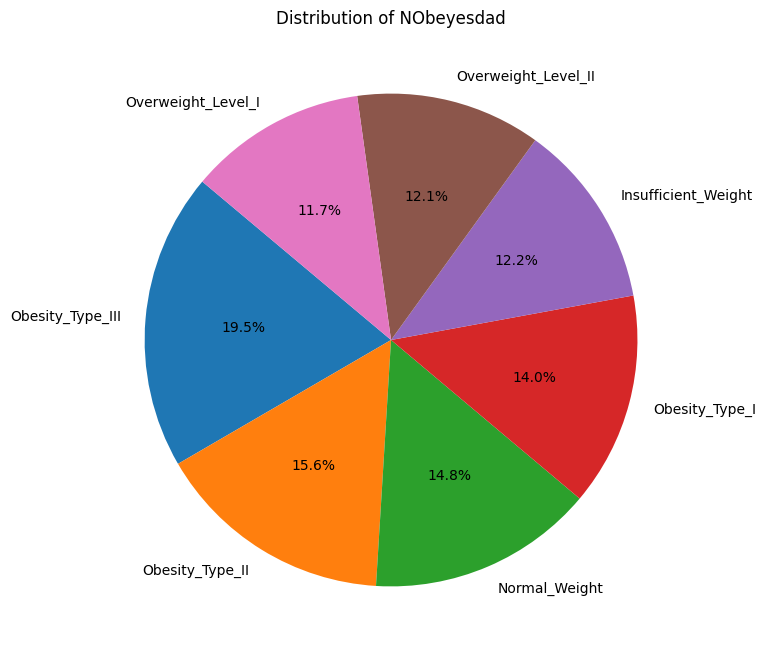

In [95]:
import matplotlib.pyplot as plt

# Group the data by 'NObeyesdad' and count the occurrences
counts = df_train['NObeyesdad'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of NObeyesdad')
plt.show()

In [77]:
# TODO maybe:
# import seaborn as sns

# sns.pairplot(df_encoded)
# sns.heatmap(df_encoded)

## Training a neural network for prediction

In [96]:
# Split features and target variable
X = data.drop(columns=["encoded_NObeyesdad", "NObeyesdad"])
y = data["encoded_NObeyesdad"]

In [79]:
# data = df_encoded
# data.head()

In [97]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

# X = data.drop(columns=["NObeyesdad"])
# y = data["NObeyesdad"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(y_train.unique()), activation='softmax')  # Output layer with softmax activation for classification
])



In [99]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])


In [100]:

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
416/416 [==============================] - 2s 4ms/step - loss: 21.4354 - accuracy: 0.1911 - val_loss: 5.1573 - val_accuracy: 0.1812
Epoch 2/30
416/416 [==============================] - 2s 5ms/step - loss: 5.5507 - accuracy: 0.2957 - val_loss: 2.2226 - val_accuracy: 0.3955
Epoch 3/30
416/416 [==============================] - 2s 4ms/step - loss: 4.1364 - accuracy: 0.3492 - val_loss: 4.1425 - val_accuracy: 0.2655
Epoch 4/30
416/416 [==============================] - 1s 3ms/step - loss: 3.6326 - accuracy: 0.3811 - val_loss: 5.3451 - val_accuracy: 0.3977
Epoch 5/30
416/416 [==============================] - 1s 3ms/step - loss: 3.4535 - accuracy: 0.4111 - val_loss: 2.4830 - val_accuracy: 0.3790
Epoch 6/30
416/416 [==============================] - 1s 3ms/step - loss: 2.4422 - accuracy: 0.4716 - val_loss: 1.8202 - val_accuracy: 0.4585
Epoch 7/30
416/416 [==============================] - 1s 3ms/step - loss: 2.5144 - accuracy: 0.4729 - val_loss: 1.8973 - val_accuracy: 0.4684
Epoch

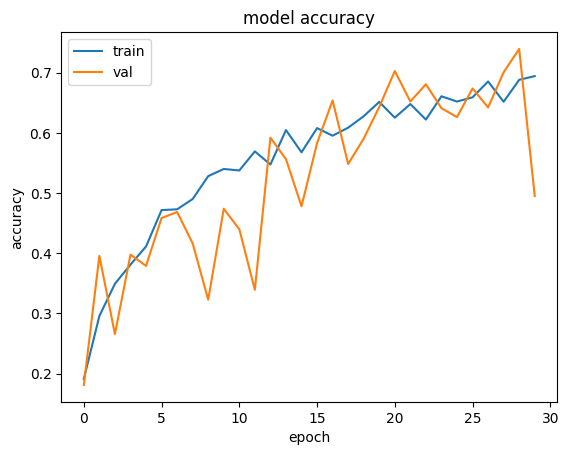

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [102]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

130/130 [==============================] - 0s 2ms/step - loss: 1.4352 - accuracy: 0.5149
Test Accuracy: 0.5149325728416443


## Prepare submission on kaggle

In [103]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


### One hot encode features

In [105]:
import pandas as pd

# Initialize the DataFrame with your data
# Assuming df_train is your DataFrame

df_encoded_test = df_test.copy()

id_col = df_test["id"]
# drop the id column
df_encoded.drop(columns='id')

# List of columns to one-hot encode
columns_to_encode = ['Gender', 'CAEC', 'FAF', 'family_history_with_overweight',
                     'FAVC', 'CALC', 'MTRANS', 'SMOKE', 'SCC']
                    #  'NObeyesdad'

# Perform one-hot encoding for each column and concatenate with the original DataFrame
for col in columns_to_encode:
    one_hot_encoded = pd.get_dummies(df_encoded_test[col], prefix=col)
    df_encoded_test = pd.concat([df_encoded_test, one_hot_encoded], axis=1)

# Drop the original columns
df_encoded_test.drop(columns=columns_to_encode, inplace=True)

print(df_encoded_test)


          id        Age    Height      Weight      FCVC       NCP      CH2O  \
0      20758  26.899886  1.848294  120.644178  2.938616  3.000000  2.825629   
1      20759  21.000000  1.600000   66.000000  2.000000  1.000000  3.000000   
2      20760  26.000000  1.643355  111.600553  3.000000  3.000000  2.621877   
3      20761  20.979254  1.553127  103.669116  2.000000  2.977909  2.786417   
4      20762  26.000000  1.627396  104.835346  3.000000  3.000000  2.653531   
...      ...        ...       ...         ...       ...       ...       ...   
13835  34593  23.327836  1.721384   78.030383  2.813234  3.000000  1.000000   
13836  34594  29.000000  1.590000   62.000000  3.000000  3.000000  2.000000   
13837  34595  22.935612  1.585547   44.376637  3.000000  2.273740  2.000000   
13838  34596  21.000000  1.620000   53.000000  2.000000  3.000000  2.000000   
13839  34597  26.490926  1.812259  120.980508  2.744994  3.000000  2.205977   

            TUE  Gender_Female  Gender_Male  ...  C

In [106]:
from sklearn.preprocessing import LabelEncoder
X_test = df_encoded_test

In [107]:
y_test = model.predict(X_test)

predicted_labels = tf.argmax(y_test, axis=1).numpy()

predicted_labels

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 1390), found shape=(None, 1291)


In [ ]:

# Optionally, decode the predicted labels if needed
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)


In [ ]:
decoded_predicted_labels

In [ ]:
df_encoded_test["NObeyesdad"] = decoded_predicted_labels
df_encoded_test.head()